In [2]:
import zipline
# from zipline.examples import buyapple

%load_ext zipline

In [3]:
%%zipline --start 2014-1-1 --end 2018-1-1 -o data/dma.pickle --capital-base 1000


from zipline.api import order_target, record, symbol, order_value
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.asset = symbol('WMT')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 200:
        return

    # print(context.portfolio.positions)
    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=50, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=200, frequency="1d").mean()
    shares = 0.0
    # Trading logic
    if short_mavg > long_mavg:
        # if data.can_trade(context.asset):
            # order_target(context.asset, shares)
            order_value(context.asset, context.portfolio.cash)
            shares=context.portfolio.cash/data.current(context.asset, 'price')
            print('shares to buy: ' + str(shares) + ' cash we have: ' + str(context.portfolio.cash))
            # print(get_open_orders())
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(STOCK=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg,
           cash=context.portfolio.cash)

25
shares to buy: 0.007137547735950251 cash we have: 0.5233249999998725
shares to buy: 0.007145344074274611 cash we have: 0.5233249999998725
shares to buy: 0.007171782924487769 cash we have: 0.5233249999998725
shares to buy: 0.007093046896176097 cash we have: 0.5233249999998725
shares to buy: 0.007156091891150998 cash we have: 0.5233249999998725
shares to buy: 0.00717473265697659 cash we have: 0.5233249999998725
shares to buy: 0.00713949522510058 cash we have: 0.5233249999998725
shares to buy: 0.007094970173534062 cash we have: 0.5233249999998725
shares to buy: 0.0071356013089701725 cash we have: 0.5233249999998725
shares to buy: 0.00711619526787969 cash we have: 0.5233249999998725
shares to buy: 0.0070767410412423595 cash we have: 0.5233249999998725
shares to buy: 0.007091124661244885 cash we have: 0.5233249999998725
shares to buy: 0.007082487481389532 cash we have: 0.5233249999998725
shares to buy: 0.007137547735950251 cash we have: 0.5233249999998725
shares to buy: 0.007179654273561

,STOCK,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,cash,ending_cash,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2014-01-02 21:00:00+00:00,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,0.0,NaN,1000.00000,...,NaN,0.0,0,NaN,1000.00000,0.00,0.00,1,[],0.0
2014-01-03 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.0,NaN,1000.00000,...,NaN,0.0,0,NaN,1000.00000,0.00,0.00,2,[],0.0
2014-01-06 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.0,NaN,1000.00000,...,NaN,0.0,0,NaN,1000.00000,0.00,0.00,3,[],0.0
2014-01-07 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.0,NaN,1000.00000,...,NaN,0.0,0,NaN,1000.00000,0.00,0.00,4,[],0.0
2014-01-08 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.0,NaN,1000.00000,...,NaN,0.0,0,NaN,1000.00000,0.00,0.00,5,[],0.0
2014-01-09 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.0,NaN,1000.00000,...,NaN,0.0,0,NaN,1000.00000,0.00,0.00,6,[],0.0
2014-01-10 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.0,NaN,1000.00000,...,NaN,0.0,0,NaN,1000.00000,0.00,0.00,7,[],0.0
2014-01-13 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.0,NaN,1000.00000,...,NaN,0.0,0,NaN,1000.00000,0.00,0.00,8,[],0.0
2014-01-14 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.0,NaN,1000.00000,...,NaN,0.0,0,NaN,1000.00000,0.00,0.00,9,[],0.0
2014-01-15 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.0,NaN,1000.00000,...,NaN,0.0,0,NaN,1000.00000,0.00,0.00,10,[],0.0


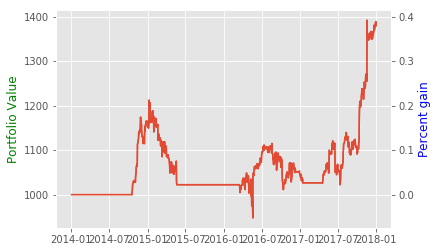

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

pd.set_option('display.float_format', lambda x: '%.5f' % x)
perf = pd.read_pickle('data/dma.pickle') # read in perf DataFrame
style.use('ggplot')

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(perf.portfolio_value)
ax2.plot(perf.portfolio_value.pct_change().fillna(0).add(1).cumprod().sub(1))

ax1.set_ylabel('Portfolio Value', color='g')
ax2.set_ylabel('Percent gain', color='b')

# make it sell stocks
# make it not exceed my capital base

plt.show()

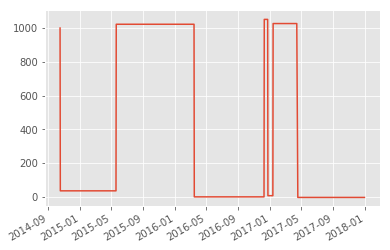

In [5]:
perf['cash'].plot()

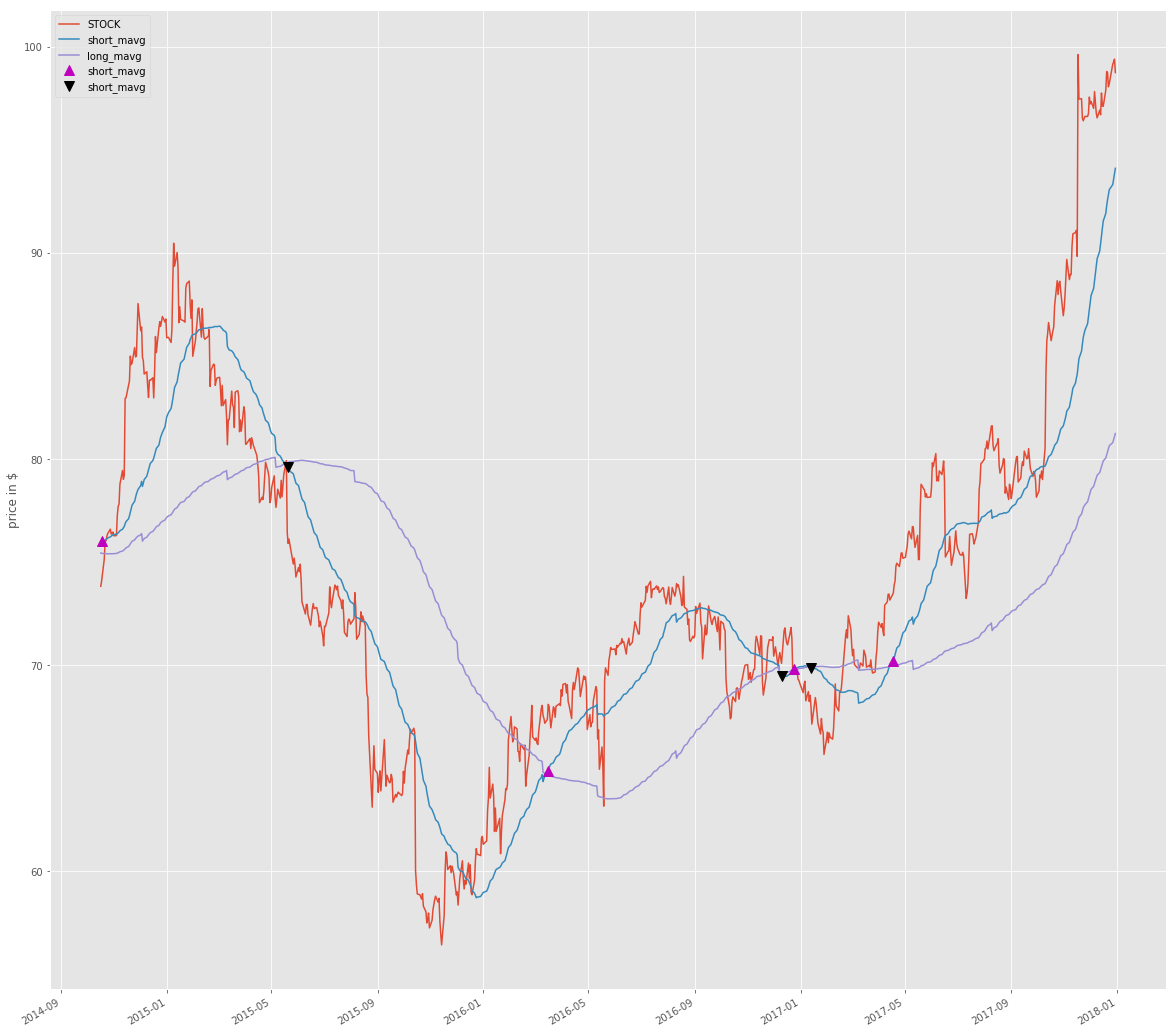

In [6]:
    fig = plt.figure()
    fig.set_size_inches(20,20)

    ax2 = fig.add_subplot(111)
    perf['STOCK'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.iloc[[t != [] for t in perf.transactions]]
    buys = perf_trans.iloc[
        [t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.iloc[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]

    ax2.plot(buys.index, perf.short_mavg.loc[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.loc[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')

    plt.legend(loc=0)
    plt.show()